In [1]:
import tensorflow as tf

In [2]:
(x_train, y_train) , (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

x_valid, X_train = x_train[:5000], x_train[5000:]
y_valid, Y_train = y_train[:5000], y_train[5000:]

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(55000, 28, 28)

In [4]:
Y_train.shape

(55000,)

In [5]:
set(Y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')                                
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(lr=1e-3),
              metrics=['accuracy'])

In [9]:
history = model.fit(X_train, Y_train, epochs=10,validation_data=(x_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6141 - accuracy: 0.7817 - val_loss: 0.4752 - val_accuracy: 0.8338
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3679 - accuracy: 0.8661 - val_loss: 0.3595 - val_accuracy: 0.8736
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3364 - accuracy: 0.8738 - val_loss: 0.3258 - val_accuracy: 0.8800
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3033 - accuracy: 0.8881 - val_loss: 0.3061 - val_accuracy: 0.8874
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2850 - accuracy: 0.8937 - val_loss: 0.3130 - val_accuracy: 0.8868
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2672 - accuracy: 0.8977 - val_loss: 0.3160 - val_accuracy: 0.8882
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2582 - accuracy: 0.9039 - val_loss: 0.3127 - val_accuracy:

In [10]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3699 - accuracy: 0.8752


[0.36986392736434937, 0.8751999735832214]

In [11]:
history.history

{'accuracy': [0.8261454701423645,
  0.8654909133911133,
  0.8765818476676941,
  0.8878363370895386,
  0.8925636410713196,
  0.8971818089485168,
  0.9027818441390991,
  0.9065272808074951,
  0.9102545380592346,
  0.9144909381866455],
 'loss': [0.48490872979164124,
  0.36508700251579285,
  0.32916149497032166,
  0.3030915856361389,
  0.28707337379455566,
  0.2706991732120514,
  0.257444828748703,
  0.248586505651474,
  0.2354745715856552,
  0.22627264261245728],
 'val_accuracy': [0.8338000178337097,
  0.8736000061035156,
  0.8799999952316284,
  0.8873999714851379,
  0.8867999911308289,
  0.8881999850273132,
  0.8881999850273132,
  0.8881999850273132,
  0.8870000243186951,
  0.8849999904632568],
 'val_loss': [0.475193589925766,
  0.35950955748558044,
  0.3258450925350189,
  0.30611324310302734,
  0.31297510862350464,
  0.31604698300361633,
  0.31270140409469604,
  0.3205147087574005,
  0.3218688666820526,
  0.33312034606933594]}

Text(0.5, 1.0, 'validiation_loss_accuracy')

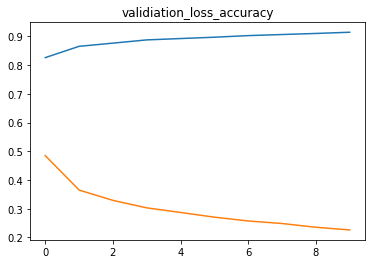

In [16]:
import numpy as np
import matplotlib.pyplot as plt

a = np.arange(10)
plt.figure()
plt.plot(a,history.history['accuracy'])
plt.plot(a,history.history['loss'])
plt.title('validiation_loss_accuracy')